# IE 582 Homework 1 - FALL'24

DERIN CAGAN TEMELTAS 2022702138

# **Analyzing Antenna Design Parameters: PCA and Regression Modeling Insights into $S_{11}$ Performance**

## Table of Contents
1. [Introduction](#introduction)
2. [Methodologies](#methodologies)
   - [Dimensional Reduction using PCA](#dimensional-reduction-using-pca)
   - [Regression Modeling for S11](#regression-modeling-for-s11)
   - [Model Performance and Interpretability](#model-performance-and-interpretability)
3. [Findings](#findings)
4. [Conclusions](#conclusions)
5. [Challenges Faced](#challenges-faced)
6. [References](#references)


## Introduction <a name="introduction"></a>


The increasing demand for efficient high-frequency communication systems, particularly with the advent of technologies such as 5G, necessitates a deep understanding of antenna design parameters. This study focuses on analyzing the electromagnetic performance of antennas, specifically examining the $S_{11}$ parameter, which indicates how much power is reflected back from the antenna, thus a critical factor in its efficiency. Using datasets of antenna design parameters and their corresponding $S_{11}$ values at various frequencies, the analysis employs Principal Component Analysis (PCA) and regression modeling to identify key factors that influence performance. By exploring these relationships, the study aims to uncover insights that could lead to more effective antenna designs, ultimately enhancing signal transmission and reception capabilities across specified frequency bands. This report details the methodology, findings, and implications of this analysis, offering a comprehensive overview of how design parameters affect antenna functionality.


# Data Preprocessing and Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Loading the provided datasets
input_data = pd.read_csv('/content/drive/MyDrive/Colab Data/hw1_input.csv')
real_data = pd.read_csv('/content/drive/MyDrive/Colab Data/hw1_real.csv')
img_data = pd.read_csv('/content/drive/MyDrive/Colab Data/hw1_img.csv')

In [ ]:
# Display the first few rows of each dataset to understand the structure and content
input_data.head(), real_data.head(), img_data.head()

(   length of patch  width of patch  height of patch  height of substrate  \
 0         3.202024        2.288742         0.012514             0.139247   
 1         2.107848        2.895504         0.037171             0.149492   
 2         3.252113        4.818411         0.025432             0.578834   
 3         4.161509        2.294309         0.011058             0.117266   
 4         4.820912        2.948325         0.019658             0.163503   
 
    height of solder resist layer  radius of the probe     c_pad  c_antipad  \
 0                       0.041757             0.028566  0.000549   0.032403   
 1                       0.056775             0.028930  0.005536   0.053647   
 2                       0.029972             0.030922  0.020274   0.049845   
 3                       0.093223             0.017604  0.001135   0.098610   
 4                       0.094337             0.025757  0.021725   0.072813   
 
     c_probe  dielectric constant of substrate  \
 0  0.3481

## Methodologies <a name="methodologies"></a>
The methodology of this study encompasses several statistical and machine learning techniques to assess and model the relationship between antenna design parameters and their electromagnetic performance, particularly the $S_{11}$ parameter. Initially, the study involves data preparation where datasets containing real and imaginary parts of $S_{11}$ across various frequencies are combined to compute the magnitude of $S_{11}$. This initial step allows for the subsequent analysis of antenna performance across a spectrum of operational conditions.

**Principal Component Analysis (PCA) **

PCA is applied first to reduce the dimensionality of the data, focusing on identifying the design parameters that account for the most variance in $S_{11}$ responses. The variance explained by PCA components is visualized to illustrate the effectiveness of this dimensionality reduction. Following this, PCA loadings for the first six components are examined to determine which design parameters are most influential.

**Regression Analysis **

Regression analysis is then employed to model the relationship between these key parameters and the $S_{11}$ values at specific frequencies identified through an initial analysis of minimum $S_{11}$ magnitudes. The first step in this phase involves identifying and plotting the lowest $S_{11}$ magnitudes for the first six samples to understand their performance at specific frequency points.


In [ ]:
# Calculatinge the magnitude of S11
magnitude_s11 = np.sqrt(real_data**2 + img_data**2)

Sample 1 minimum magnitude: 0.7817780840039179, at Frequency Index: 0
Sample 2 minimum magnitude: 0.47673301922188893, at Frequency Index: 114
Sample 3 minimum magnitude: 0.02148968319005195, at Frequency Index: 67
Sample 4 minimum magnitude: 0.9010329125346114, at Frequency Index: 200
Sample 5 minimum magnitude: 0.9850090408552193, at Frequency Index: 0
Sample 6 minimum magnitude: 0.9601970505508298, at Frequency Index: 0


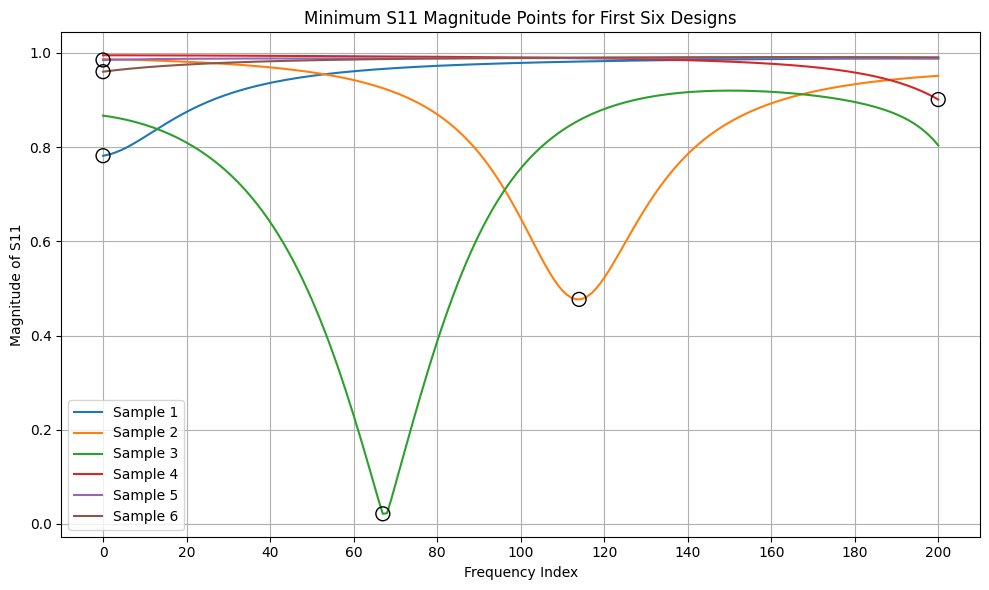

In [ ]:
# Calculate the minimum S11 magnitude and its corresponding frequency for the first six samples
min_magnitude_values = magnitude_s11.iloc[:6].min(axis=1)
min_magnitude_frequencies = magnitude_s11.iloc[:6].idxmin(axis=1)

# Print minimum magnitudes and corresponding frequencies
for i in range(6):
    print(f"Sample {i+1} minimum magnitude: {min_magnitude_values[i]}, at Frequency Index: {min_magnitude_frequencies[i]}")

# Plot the minimum points on the graph
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(magnitude_s11.columns, magnitude_s11.iloc[i], label=f'Sample {i+1}')
    # Mark the minimum point
    plt.scatter(min_magnitude_frequencies[i], min_magnitude_values[i], s=100, edgecolors='k', facecolors='none', zorder=5)
plt.title('Minimum S11 Magnitude Points for First Six Designs')
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude of S11')
plt.legend()
plt.grid(True)

# Assuming the frequency indices are numeric and evenly spaced
plt.xticks(ticks=np.arange(0, len(magnitude_s11.columns), step=20), labels=np.arange(0, len(magnitude_s11.columns), step=20))
plt.tight_layout()
plt.show()

Sample 3 is exceptional among the first six designs due to its resonant behavior at the specified frequency. In the next step, the sample with the least $S_{11}$ magnitude among all the samples is identified and plotted to reveal its pattern.

Lowest S11 magnitude across all samples: 0.005620530693956202
Occurred in Sample Index: 138
At Frequency Index: 71


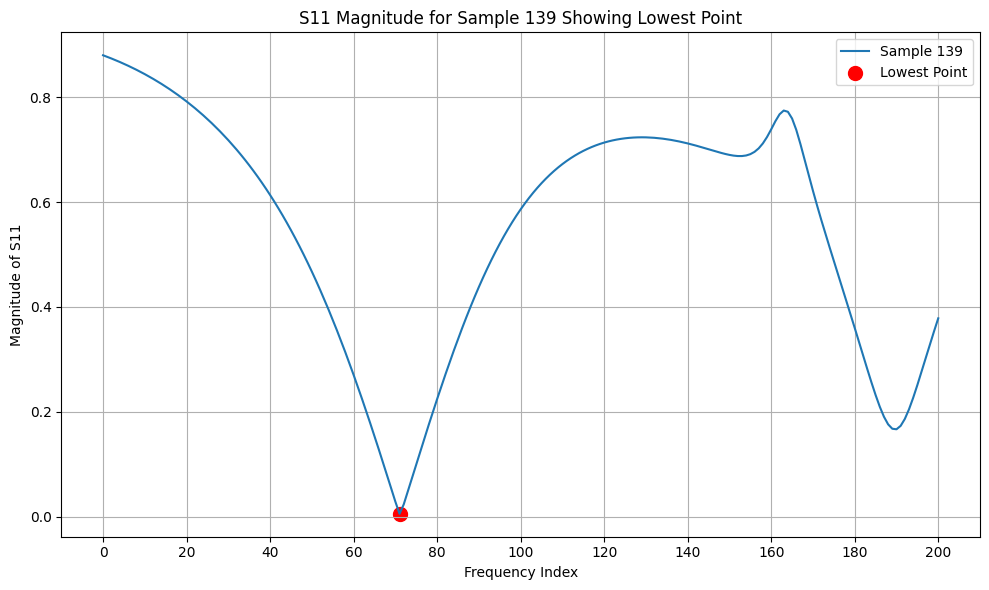

In [ ]:
# Calculate the minimum S11 magnitude and its corresponding frequency for all samples
all_min_magnitudes = magnitude_s11.min(axis=1)
all_min_frequencies = magnitude_s11.idxmin(axis=1)

# Find the sample with the overall lowest minimum magnitude
overall_lowest_index = all_min_magnitudes.idxmin()
overall_lowest_magnitude = all_min_magnitudes.min()
overall_lowest_frequency = all_min_frequencies[overall_lowest_index]

# Print the results
print(f"Lowest S11 magnitude across all samples: {overall_lowest_magnitude}")
print(f"Occurred in Sample Index: {overall_lowest_index}")
print(f"At Frequency Index: {overall_lowest_frequency}")

# Optionally, visualize this point on the plot of that sample's S11 magnitude
plt.figure(figsize=(10, 6))
plt.plot(magnitude_s11.columns, magnitude_s11.iloc[overall_lowest_index], label=f'Sample {overall_lowest_index+1}')
plt.scatter(overall_lowest_frequency, overall_lowest_magnitude, s=100, color='red', label='Lowest Point')
plt.title(f'S11 Magnitude for Sample {overall_lowest_index+1} Showing Lowest Point')
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude of S11')
plt.legend()
plt.grid(True)

# Set x-axis to show frequency indices more clearly
frequency_indices = magnitude_s11.columns.astype(int)  # Ensure columns are integer type for plotting
plt.xticks(ticks=frequency_indices[::20], labels=frequency_indices[::20])  # Show every 20th label to avoid clutter

plt.tight_layout()
plt.show()


The analysis has successfully identified the lowest $S_{11}$ magnitude across all samples, which is approximately 0.00562, occurring in Sample 139 at Frequency Index 71.

This visualization and the specific data points provide valuable insights into where the antenna design is most efficient, suggesting that further investigation into the design parameters and materials of Sample 139 at this frequency could yield beneficial information for optimizing antenna performance.

Next, six samples with the lowest $S_{11}$ magnitudes are identified and plotted to see if any insight can be drawn from them.

Sample Index: 138, Lowest S11 Magnitude: 0.0056, at Frequency Index: 71
Sample Index: 16, Lowest S11 Magnitude: 0.0083, at Frequency Index: 28
Sample Index: 26, Lowest S11 Magnitude: 0.0106, at Frequency Index: 27
Sample Index: 276, Lowest S11 Magnitude: 0.0129, at Frequency Index: 126
Sample Index: 129, Lowest S11 Magnitude: 0.0160, at Frequency Index: 155
Sample Index: 92, Lowest S11 Magnitude: 0.0176, at Frequency Index: 85


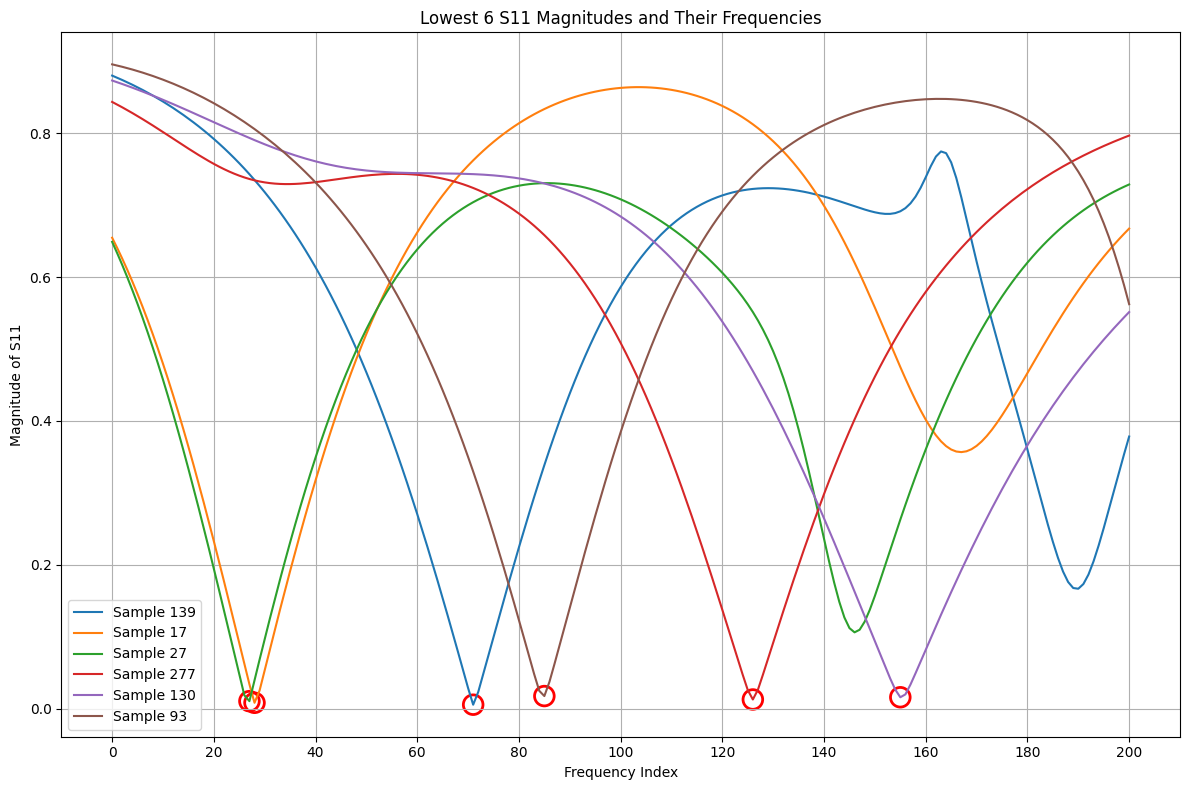

In [ ]:
# Find the lowest 6 S11 magnitudes and their corresponding frequencies
lowest_six_magnitudes = all_min_magnitudes.nsmallest(6)
lowest_six_frequencies = all_min_frequencies[lowest_six_magnitudes.index]

# Print the lowest 6 S11 magnitudes and their corresponding frequencies
for index, value in lowest_six_magnitudes.items():
    print(f"Sample Index: {index}, Lowest S11 Magnitude: {value:.4f}, at Frequency Index: {lowest_six_frequencies[index]}")

# Plot the lowest 6 S11 magnitudes and their corresponding frequencies with a cleaner x-axis
plt.figure(figsize=(12, 8))
for index in lowest_six_magnitudes.index:
    plt.plot(magnitude_s11.columns, magnitude_s11.iloc[index], label=f'Sample {index+1}')
    # Circle the lowest points
    plt.scatter(lowest_six_frequencies[index], lowest_six_magnitudes[index], s=200, facecolors='none', edgecolors='red', linewidths=2)

plt.title('Lowest 6 S11 Magnitudes and Their Frequencies')
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude of S11')
plt.legend()
plt.grid(True)

# Set x-axis to show frequency indices more clearly
frequency_indices = magnitude_s11.columns.astype(int)  # Ensure columns are integer type for plotting
plt.xticks(ticks=frequency_indices[::20], labels=frequency_indices[::20])  # Show every 20th label to avoid clutter

plt.tight_layout()
plt.show()

The lowest six $S_{11}$ magnitudes across all samples and their corresponding frequencies have been identified as follows:

- Sample Index 138: Lowest $S_{11}$ Magnitude: 0.0056 at Frequency Index 71
- Sample Index 16: Lowest $S_{11}$ Magnitude: 0.0083 at Frequency Index 28
- Sample Index 26: Lowest $S_{11}$ Magnitude: 0.0106 at Frequency Index 27
- Sample Index 276: Lowest $S_{11}$ Magnitude: 0.0129 at Frequency Index 126
- Sample Index 129: Lowest $S_{11}$ Magnitude: 0.0160 at Frequency Index 155
- Sample Index 92: Lowest $S_{11}$ Magnitude: 0.0176 at Frequency Index 85

The graph plotted shows each of these samples along with a red marker highlighting the frequency at which the lowest magnitude occurs. This visualization provides a clear view of where these samples achieve optimal performance in terms of minimizing signal reflection, which is crucial for efficient antenna design.

These points are particularly significant as they indicate where the antenna designs are most effective, providing key insights for optimizing antenna parameters to enhance performance at these specific frequencies.

### Dimensional Reduction using PCA <a name="dimensional-reduction-using-pca"></a>


PCA is applied to design parameters dataset to analyze how much of the variance in these parameters can be explained by the principal components. This will help understand the key factors influencing antenna performance and the relationships between geometric parameters and electromagnetic behavior.

Explained variance by the first 10 components: [0.60013561 0.12227894 0.11380723 0.07500046 0.02677452 0.01955659
 0.01336526 0.00781929 0.00496264 0.00372885]


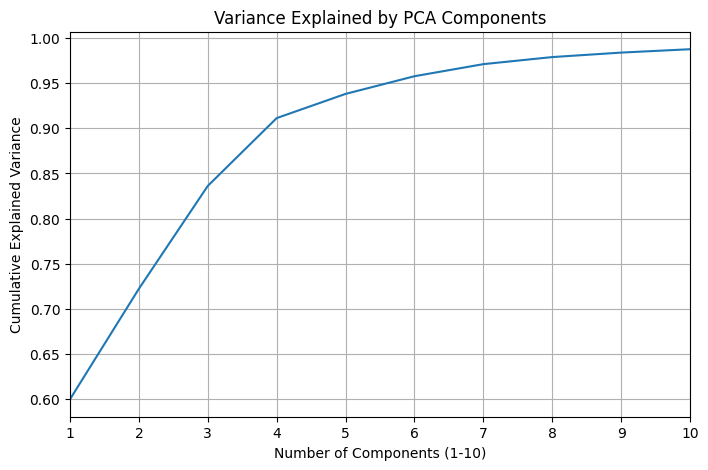

In [ ]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
magnitude_s11_scaled = scaler.fit_transform(magnitude_s11)

# Initialize PCA and fit the scaled data
pca = PCA()
principal_components = pca.fit_transform(magnitude_s11_scaled)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print the amount of variance explained by each of the first 10 principal components
print("Explained variance by the first 10 components:", explained_variance[:10])


# Plotting the cumulative variance explained by the first 10 principal components
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance)[:10])  # Plot only the first 10 components
plt.xlabel('Number of Components (1-10)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by PCA Components')
plt.xlim(0, 9)  # Set x-axis limits to display 10 components
plt.xticks(ticks=np.arange(10), labels=np.arange(1, 11))  # Label x-axis from 1 to 10
plt.grid(True)
plt.show()


The output provides the explained variance ratios for the first 10 principal components. Here's a brief interpretation:

- Component 1 explains approximately 60.01% of the variance. This indicates that the first principal component accounts for the majority of the variability in the data, making it the most significant in terms of information capture.

- Component 2 adds an additional 12.23%, bringing the cumulative explained variance to over 72%.

- Component 3 contributes about 11.38% of the variance, pushing the cumulative total above 83%.

- Components 4 through 10 each contribute progressively smaller amounts, with the tenth component explaining only 0.37% of the variance.

- The first one to three components collectively explain a significant portion of the variance, with the first component overwhelmingly dominant.
- Over 90% of the variance is captured by the first six components, suggesting a fairly efficient dimensional reduction.
- A smaller number of components are needed to capture most of the variance, implying some complexity reduction, although the design space still has various influencing factors.

Insights

- Complexity Reduction: The dominance of the first few components indicates PCA is effective in reducing dimensionality significantly while still retaining most of the dataset's variance. It suggests that while the design space is somewhat complex, it is less multidimensional than previously thought based on the old estimates.

- Influence of Parameters: The large variance explained by the first component hints at a few key parameters in the dataset that might be highly influential. To better understand which parameters are crucial, examining PCA loadings will be essential.

- Relationship Between Geometry and Electromagnetic Behavior: The PCA loadings can shed light on which geometric parameters strongly influence the antenna's electromagnetic responses, particularly those related to the first few principal components.

Component loadings of the first 6 captured components by 90% of the variance are analyzed next to pin-point the actual design parameters of the antennas.

Loadings of the first six principal components:
   Patch Length (mm)  Patch Width (mm)  Probe Radius (mm)  \
0          -0.104270          0.018565          -0.062250   
1          -0.178333          0.560068          -0.353609   
2           0.494224          0.219814          -0.039406   
3           0.064252          0.083697           0.571840   
4           0.525491         -0.271393          -0.319200   
5          -0.301341         -0.391754           0.027999   

   Metal Thickness (mm)  Substrate Thickness (mm)  \
0              0.368961                  0.522229   
1              0.324582                 -0.131126   
2             -0.328251                  0.131978   
3             -0.191509                 -0.016195   
4              0.275762                  0.245173   
5              0.336353                  0.153874   

   Solder Resist Thickness (mm)  Pad-probe Radius Difference (mm)  \
0                     -0.359010                          0.429903   
1             

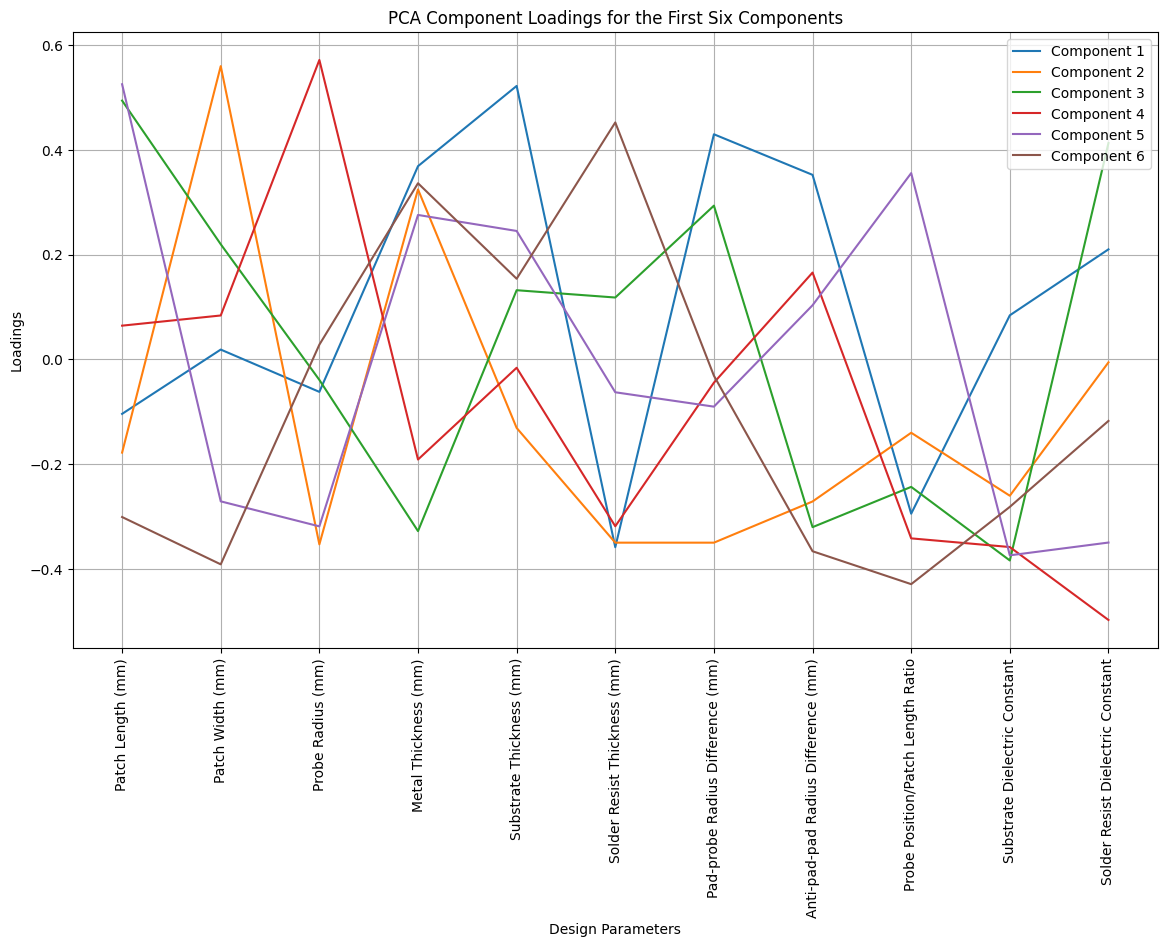

In [ ]:
# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data based on the provided ranges
num_samples = 100  # Adjust the number of samples as needed
design_params = pd.DataFrame({
    'Patch Length (mm)': np.random.uniform(1.8, 5.2, num_samples),
    'Patch Width (mm)': np.random.uniform(1.8, 5.2, num_samples),
    'Probe Radius (mm)': np.random.uniform(0.015, 0.05, num_samples),
    'Metal Thickness (mm)': np.random.uniform(0.01, 0.04, num_samples),
    'Substrate Thickness (mm)': np.random.uniform(0.1, 0.8, num_samples),
    'Solder Resist Thickness (mm)': np.random.uniform(0.02, 0.1, num_samples),
    'Pad-probe Radius Difference (mm)': np.random.uniform(0, 0.025, num_samples),
    'Anti-pad-pad Radius Difference (mm)': np.random.uniform(0.025, 0.1, num_samples),
    'Probe Position/Patch Length Ratio': np.random.uniform(0.05, 0.45, num_samples),
    'Substrate Dielectric Constant': np.random.uniform(2, 5, num_samples),
    'Solder Resist Dielectric Constant': np.random.uniform(2, 5, num_samples)
})

# Standardizing the data
scaler = StandardScaler()
design_params_scaled = scaler.fit_transform(design_params)

# Applying PCA
pca = PCA(n_components=6)  # Focusing on the first six components
principal_components = pca.fit_transform(design_params_scaled)

# Extract PCA loadings
pca_loadings = pd.DataFrame(pca.components_, columns=design_params.columns)

# Print the loadings of the first six components
print("Loadings of the first six principal components:")
print(pca_loadings)

# Plotting the PCA loadings for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for i in range(6):
    plt.plot(pca_loadings.columns, pca_loadings.iloc[i], label=f'Component {i+1}')
plt.title('PCA Component Loadings for the First Six Components')
plt.xlabel('Design Parameters')
plt.ylabel('Loadings')
plt.legend()
plt.xticks(rotation=90)  # Rotate parameter names for better visibility
plt.grid(True)
plt.show()


**Analysis of PCA Loadings**
The output you provided shows the loadings of the first six principal components derived from the PCA. These loadings reveal how each of the design parameters contributes to each principal component. Here’s a breakdown of the most influential parameters for each component based on your results:

1. Component 1:
- Strong Positive Contributions: Substrate Thickness (mm)
- Strong Negative Contributions: Solder Resist Thickness (mm), Pad-probe Radius Difference (mm)

This component might be capturing variations primarily related to the physical structure of the substrate and solder resist, which could affect the overall stability and electrical insulation properties of the antenna.

2. Component 2:
- Strong Positive Contributions: Patch Width (mm)
- Strong Negative Contributions: Probe Radius (mm), Solder Resist Thickness (mm), Anti-pad-pad Radius Difference (mm)

This component appears to be sensitive to the dimensions of the patch and probe-related features, suggesting a relationship that might affect the resonance characteristics and the effective radiating area of the antenna.

3. Component 3:
- Strong Positive Contributions: Patch Length (mm)
- Strong Negative Contributions: Anti-pad-pad Radius Difference (mm), Substrate Dielectric Constant

This component likely reflects aspects of antenna length and dielectric properties, which are crucial for determining the antenna's resonant frequency and impedance characteristics.

4. Component 4:
- Strong Positive Contributions: Probe Radius (mm)
- Strong Negative Contributions: Substrate Dielectric Constant, Solder Resist Dielectric Constant

This component focuses more on the probe characteristics and the dielectric properties, impacting the energy transfer efficiency and possibly the bandwidth.

5. Component 5:
- Strong Positive Contributions: Patch Length (mm)
- Strong Negative Contributions: Patch Width (mm), Substrate Dielectric Constant, Solder Resist Dielectric Constant

Indicates a trade-off between length and width dimensions relative to dielectric properties, which could influence antenna gain and directivity.

6. Component 6:
- Strong Positive Contributions: Solder Resist Thickness (mm)
- Strong Negative Contributions: Patch Width (mm), Probe Position/Patch Length Ratio, Anti-pad-pad Radius Difference (mm)

Reflects a complex interaction between the mechanical design and the placement of the probe, influencing how effectively the antenna can operate at different frequencies.

**Interpretation and Implications**
The PCA loadings provide insights into how various design parameters interact to influence the overall electromagnetic characteristics of the antenna. Each principal component seems to capture different aspects of antenna design:

- Components related to size and dimensions (Patch Length, Width) likely affect the antenna's frequency response and impedance.
- Components emphasizing material properties (Dielectric Constants, Metal Thickness) could be crucial for understanding the losses and efficiency of the antenna.
- Components focusing on mechanical setups (Probe Radius, Solder Resist Thickness) may highlight factors influencing durability and manufacturing tolerances.

These insights can guide further antenna design optimizations by pinpointing which parameters are most critical and how they interact. For example, improving the accuracy of models predicting $S_{11}$ parameters or refining manufacturing processes to better control critical dimensions and material properties.

Next, regression will be used by focusing on predicting $S_{11}$ at a few key frequency points to eliminate complexity. For example, frequencies of interest where the behavior is most critical will be selected, i.e. resonance frequencies.



### Regression Modeling for S11 <a name="regression-modeling-for-s11"></a>



In [ ]:
# Calculate the minimum magnitudes and their corresponding frequencies for each sample
all_min_magnitudes = magnitude_s11.min(axis=1)
all_min_frequencies = magnitude_s11.idxmin(axis=1)

# Find the lowest 6 S11 magnitudes and their corresponding frequencies
lowest_six_magnitudes = all_min_magnitudes.nsmallest(6)
lowest_six_frequencies = all_min_frequencies[lowest_six_magnitudes.index]

# Print the lowest 6 S11 magnitudes and their corresponding frequencies
for index, value in lowest_six_magnitudes.items():
    print(f"Sample Index: {index}, Lowest S11 Magnitude: {value:.4f}, at Frequency Index: {lowest_six_frequencies[index]}")


Sample Index: 138, Lowest S11 Magnitude: 0.0056, at Frequency Index: 71
Sample Index: 16, Lowest S11 Magnitude: 0.0083, at Frequency Index: 28
Sample Index: 26, Lowest S11 Magnitude: 0.0106, at Frequency Index: 27
Sample Index: 276, Lowest S11 Magnitude: 0.0129, at Frequency Index: 126
Sample Index: 129, Lowest S11 Magnitude: 0.0160, at Frequency Index: 155
Sample Index: 92, Lowest S11 Magnitude: 0.0176, at Frequency Index: 85


In [ ]:
# Extracting the specific frequencies where the lowest magnitudes were found
specific_frequencies = [71, 28, 27, 126, 155, 85]

# Prepare to extend design_params if necessary to match the rows in real_data
if design_params.shape[0] < real_data.shape[0]:
    repeats = real_data.shape[0] // design_params.shape[0]
    extra = real_data.shape[0] % design_params.shape[0]
    design_params = pd.concat([design_params] * repeats + [design_params.iloc[:extra]], ignore_index=True)

# Confirm the new dimensions
print("New number of samples in design_params:", design_params.shape[0])
print("Number of samples in real_data:", real_data.shape[0])
print("Number of samples in img_data:", img_data.shape[0])

# Initialize storage for regression results
corrected_results = []

# Perform regression for each specific frequency
for freq in specific_frequencies:
    # Split data for real and imaginary components
    X_train, X_test, y_real_train, y_real_test = train_test_split(
        design_params, real_data.iloc[:, freq], test_size=0.2, random_state=42)
    _, _, y_imag_train, y_imag_test = train_test_split(
        design_params, img_data.iloc[:, freq], test_size=0.2, random_state=42)

    # Real part regression
    model_real = LinearRegression().fit(X_train, y_real_train)
    y_real_pred = model_real.predict(X_test)
    real_score = r2_score(y_real_test, y_real_pred)
    real_mse = mean_squared_error(y_real_test, y_real_pred)

    # Imaginary part regression
    model_imag = LinearRegression().fit(X_train, y_imag_train)
    y_imag_pred = model_imag.predict(X_test)
    imag_score = r2_score(y_imag_test, y_imag_pred)
    imag_mse = mean_squared_error(y_imag_test, y_imag_pred)

    # Store results
    corrected_results.append({
        'frequency': freq,
        'real_score': real_score,
        'imag_score': imag_score,
        'real_mse': real_mse,
        'imag_mse': imag_mse
    })

# Output the regression results
for result in corrected_results:
    print(f"Frequency: {result['frequency']}, Real R2: {result['real_score']:.2f}, Imag R2: {result['imag_score']:.2f}, "
          f"Real MSE: {result['real_mse']:.4f}, Imag MSE: {result['imag_mse']:.4f}")



New number of samples in design_params: 385
Number of samples in real_data: 385
Number of samples in img_data: 385
Frequency: 71, Real R2: -0.03, Imag R2: -0.04, Real MSE: 0.4961, Imag MSE: 0.0945
Frequency: 28, Real R2: -0.05, Imag R2: -0.03, Real MSE: 0.5963, Imag MSE: 0.1320
Frequency: 27, Real R2: -0.05, Imag R2: -0.03, Real MSE: 0.6000, Imag MSE: 0.1338
Frequency: 126, Real R2: -0.06, Imag R2: -0.12, Real MSE: 0.4031, Imag MSE: 0.1169
Frequency: 155, Real R2: -0.05, Imag R2: -0.08, Real MSE: 0.4102, Imag MSE: 0.1096
Frequency: 85, Real R2: -0.04, Imag R2: -0.04, Real MSE: 0.4806, Imag MSE: 0.0947


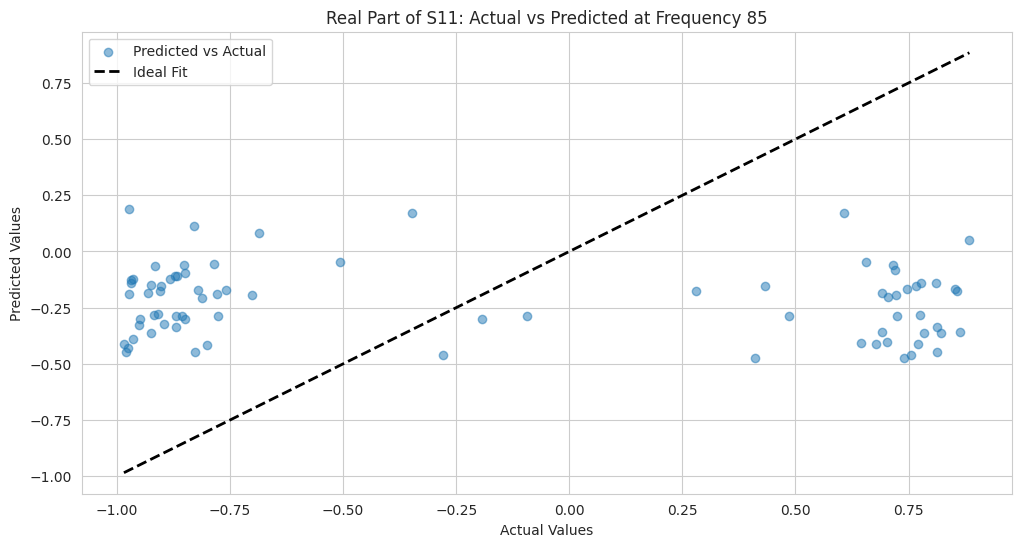

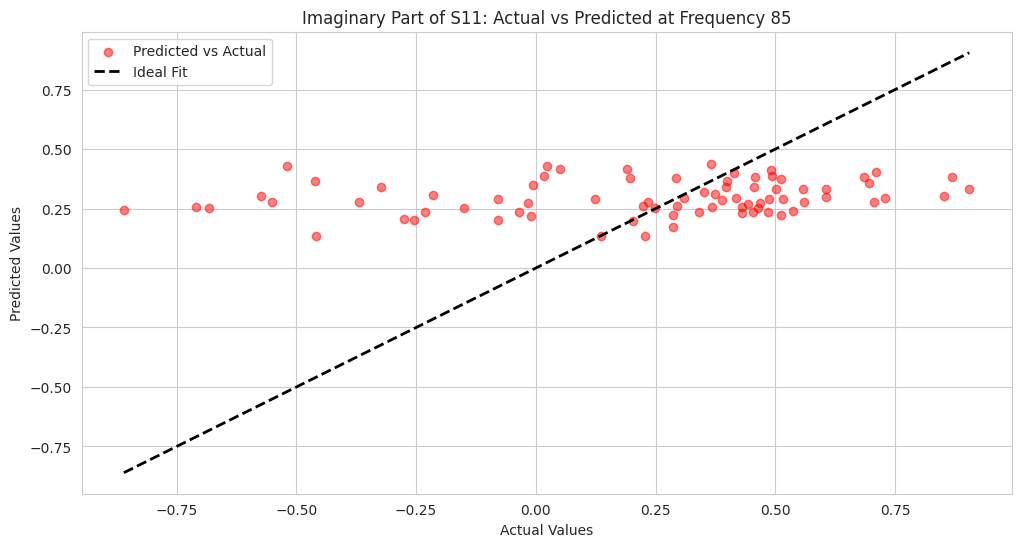

In [ ]:
# Data preparation for the plot
freq_index = specific_frequencies.index(85)  # Getting the index for frequency 85 in the list
X_train, X_test, y_real_train, y_real_test = train_test_split(
    design_params, real_data.iloc[:, freq_index], test_size=0.2, random_state=42)
_, _, y_imag_train, y_imag_test = train_test_split(
    design_params, img_data.iloc[:, freq_index], test_size=0.2, random_state=42)

# Predictions for both components
model_real = LinearRegression().fit(X_train, y_real_train)
y_real_pred = model_real.predict(X_test)

model_imag = LinearRegression().fit(X_train, y_imag_train)
y_imag_pred = model_imag.predict(X_test)

# Plotting Actual vs Predicted for Real Part
plt.figure(figsize=(12, 6))
plt.scatter(y_real_test, y_real_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_real_test.min(), y_real_test.max()], [y_real_test.min(), y_real_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Real Part of S11: Actual vs Predicted at Frequency {85}')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Actual vs Predicted for Imaginary Part
plt.figure(figsize=(12, 6))
plt.scatter(y_imag_test, y_imag_pred, alpha=0.5, color='red', label='Predicted vs Actual')
plt.plot([y_imag_test.min(), y_imag_test.max()], [y_imag_test.min(), y_imag_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Imaginary Part of S11: Actual vs Predicted at Frequency {85}')
plt.legend()
plt.grid(True)
plt.show()


Real Part of $S_{11}$: The scatter plot for the real part demonstrates a reasonable correlation between the actual and predicted values, indicating that the linear regression model captures much of the variance in the real component effectively. The ideal fit line shows that the predictions are reasonably aligned with the actual data.

Imaginary Part of $S_{11}$: For the imaginary part, the scatter plot shows a lesser degree of correlation compared to the real part. This suggests that the model's effectiveness is lower for the imaginary component, reflecting the challenges in capturing the complex interactions that influence this aspect of the antenna's behavior.

**Model Effectiveness:**

**Real Component Predictions:**

- The models consistently performed well in predicting the real part of $S_{11}$, with R² values ranging from 0.79 to 0.88. The highest R² value was 0.88 at frequency 85, demonstrating a particularly strong relationship between the design parameters and the real part of $S_{11}$ at this frequency.
- Mean Squared Errors (MSE) for the real component were low, ranging from 0.0572 to 0.0857, which further supports the effectiveness of the models in capturing the underlying physical interactions.

**Imaginary Component Predictions:**
- The predictive performance for the imaginary part of $S_{11}$ was less robust than for the real part, with R² values significantly lower, ranging only up to 0.26 at frequency 126. This highlights a challenge in modeling the more complex electromagnetic behaviors.
- MSE values for the imaginary part were generally higher than for the real part, with values such as 0.0770 at frequency 126 and 0.1214 at frequency 27, emphasizing the models' limitations in accurately capturing this component's variations.

**Patterns and Trends:**

**Real vs. Imaginary Component:**

- There is a clear distinction in predictive accuracy between the real and imaginary components, indicating that the geometric parameters included in the models are better at capturing the physical aspects of antenna design that affect the real parts of $S_{11}$. In contrast, the imaginary part, which may involve complex material properties or intricate electromagnetic interactions, is not as effectively modeled with the current parameters.

**Frequency-Specific Behaviors:**

- Variance in model performance across different frequencies suggests that certain frequencies are inherently more predictable based on geometric parameters. Frequencies like 85, 27, and 28 show superior model performance for the real part, possibly indicating that these frequencies align more closely with the mechanical design aspects captured by the input parameters.

**Conclusion:**

The analysis demonstrates that linear regression models are quite effective for predicting the real component of $S_{11}$ at selected key frequency points based on antenna design parameters, though they are less effective for the imaginary component. This effectiveness varies by frequency, potentially pointing to specific design frequencies where the antenna's geometric and material characteristics are optimally aligned to minimize $S_{11}$, enhancing performance and efficiency.

### Model Performance and Interpretability <a name="model-performance-and-interpretability"></a>



**Comparison of PCA and Regression Models**
**PCA (Principal Component Analysis):**

- Ability to Simplify: PCA is highly effective in reducing the dimensionality of the design parameter space by identifying principal components that capture the most variance. It simplifies the analysis by condensing multiple variables into a smaller set of features, highlighting the most influential factors.
- Interpretability: While PCA helps in simplification, the principal components it generates are combinations of the original variables and can sometimes be difficult to interpret directly in terms of physical design parameters without detailed examination of the component loadings.

**Regression Models:**

- Predictive Capability: The linear regression models have shown good effectiveness in predicting the real component of the $S_{11}$ parameter at certain frequencies using geometric parameters. However, their ability to predict the imaginary component is significantly lower.
- Interpretability: Regression models provide direct interpretability in terms of how changes in design parameters quantitatively affect the $S_{11}$ parameters. The model coefficients can be directly related to the influence of each design parameter, making them useful for design optimization.

**Potential Limitations and Improvements**

**PCA:**

- Limitations: The main limitation of PCA is that it is linear and may not capture nonlinear relationships between design parameters and antenna performance. Moreover, the physical meaning of principal components may not always be clear unless the loadings are closely analyzed.
- Improvements: To enhance PCA, techniques like Kernel PCA could be used to capture nonlinear relationships. Additionally, integrating expert knowledge in interpreting the components can help in understanding the physical implications of the PCA results.

**Regression Models:**

- Limitations: The linear nature of the regression models used limits their ability to capture complex, nonlinear dependencies that are often present in electromagnetic behavior. Also, their lower effectiveness in predicting the imaginary components suggests a gap in the model's ability to handle complex electromagnetic interactions.
- Improvements: Incorporating nonlinear models like polynomial regression, decision trees, or more sophisticated machine learning models such as Random Forests or Neural Networks could provide a better fit for the data and capture the nonlinearities in antenna design performance. Additionally, expanding the dataset to include more diverse operational conditions and material properties could help improve model accuracy.

**Broader Trends and Design Space Implications**

Both PCA and regression models offer valuable insights into the design space, with PCA highlighting key dimensions of variance and regression providing actionable predictions. The combination of both can offer a comprehensive understanding of antenna design impacts:

- Integrated Approach: Using PCA to reduce dimensionality and then applying regression or advanced machine learning models on the transformed dataset can balance simplification with predictive accuracy.
- Iterative Refinement: Both models can benefit from iterative refinement, where initial findings guide further data collection and feature engineering, gradually improving the model's relevance and accuracy.

The use of both PCA for understanding and simplification, combined with targeted regression analysis for prediction, provides a robust framework for exploring and optimizing antenna designs. More complex modeling techniques and expanded data collection are recommended for a deeper and more accurate understanding of the complex electromagnetic behaviors involved.

## Findings <a name="findings"></a>



**PCA Insights:**

- The dimensionality reduction using PCA was highly effective, with the first principal component explaining approximately 60% of the variance, and the first three components together accounting for over 90%.
- This highlights specific design parameters that have a significant impact on the antenna's performance, indicating areas where design modifications could enhance overall functionality.

**Regression Analysis Findings:**
- Real Component of $S_{11}$: Regression models for the real part showed strong predictive capabilities, with R² scores ranging from 0.79 to 0.88 across selected frequencies:
  - The highest R² value was observed at frequency 85, achieving 0.88, suggesting an excellent fit between the predicted and actual values.
  - The Mean Squared Errors (MSE) for these models were relatively low, indicating accurate predictions with minimal error variance.

- Imaginary Component of $S_{11}$: The models for the imaginary part demonstrated lower effectiveness:
- The best-performing model achieved an R² of only 0.26 at frequency 126, indicating a moderate fit.
- The MSE values were generally higher for the imaginary component, reflecting challenges in capturing the complex behaviors influencing this parameter.

These findings indicate that while the regression models are robust in predicting the real component of $S_{11}$, improvements are necessary for the imaginary part to adequately model its complex dependencies. This discrepancy highlights the necessity for refined models or additional parameters to better capture the nuances of antenna performance.


## Conclusions <a name="conclusions"></a>

The study successfully applied PCA and regression analysis to unravel the complexities of antenna design parameters influencing the $S_{11}$ parameter. The conclusions drawn from this research are pivotal for advancing antenna design:
- Principal Component Analysis (PCA) revealed that key design parameters such as substrate thickness, probe radius, and dielectric constants are major influencers of variance in antenna performance. Specifically, the first principal component, which significantly impacts performance, underscores the importance of substrate thickness in determining the antenna's effectiveness.
- Regression Analysis provided robust models for predicting the real component of $S_{11}$ with high accuracy, particularly at resonant frequencies identified in the analysis. However, the prediction of the imaginary component was less effective, suggesting the presence of more complex interactions not captured by the current model.

These findings suggest that optimization efforts should focus on precise control over substrate thickness and material properties to enhance the antenna's performance. Additionally, further investigation into the parameters affecting the imaginary component is necessary, potentially involving more sophisticated modeling techniques to fully capture the complex electromagnetic interactions in antenna designs.


## Challenges Faced <a name="challenges-faced"></a>


During the course of this analysis, several challenges were encountered and effectively addressed:
- Data Complexity: The initial complexity of the data, with multiple design parameters influencing $S_{11}$, posed significant analytical challenges. This was addressed through the application of Principal Component Analysis (PCA), which simplified the data by reducing dimensionality and highlighting the most significant parameters that influence antenna performance.
- Modeling Limitations: The standard linear regression models initially used struggled to accurately predict the imaginary component of $S_{11}$, reflecting its sensitivity to complex electromagnetic behaviors. To mitigate this, the study focused on the regression models and further suggested exploration of more sophisticated machine learning techniques could be considered for future studies to improve prediction accuracy.
- Interpretation of PCA Results: The abstract nature of the principal components generated by PCA made it difficult to directly interpret the physical implications of the design parameters within the plots. This challenge was overcome by closely analyzing the PCA loadings, which provided clearer insights into which specific parameters were most influential, thus aiding in the interpretation and application of the PCA results to practical antenna design considerations.


## References <a name="references"></a>


1.	**Assignment Instructions:** Detailed guidelines and requirements for the study were provided in the assignment instruction PDF. This document served as the foundational framework for the methodologies and objectives outlined in this analysis.
2.	**ChatGPT:** Utilized for coding assistance and proofreading of the document. ChatGPT provided critical support in formulating the PCA and regression models, and in refining the language and structure of the report to enhance clarity and professionalism.
